# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import numpy as np

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets. This is the amount in the savings portfolio of every union member.
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# Obtain response data from the btc_url request
btc_response_data = requests.get(btc_url).json()
print(json.dumps(btc_response_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18897862,
            "total_supply": 18897862,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 48073.0,
                    "volume_24h": 31326522948,
                    "market_cap": 909995775280,
                    "percentage_change_1h": -0.127187800032761,
                    "percentage_change_24h": 0.59393293070658,
                    "percentage_change_7d": -10.622579451337,
                    "percent_change_1h": -0.127187800032761,
                    "percent_change_24h": 0.59393293070658,
                    "percent_change_7d": -10.622579451337
                },
                "CAD": {
                    "price": 61172.8925,
                    "volume_24h": 39863000451.33,
                    "ma

In [6]:
# Obtain the BTC price from the JSON response
btc_price = btc_response_data['data']['1']['quotes']['CAD']['price']
btc_price

61172.8925

In [7]:
# Fetch current ETH price
# Obtain response data from the eth_url request
eth_response_data = requests.get(eth_url).json()
print(json.dumps(eth_response_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 118692003,
            "total_supply": 118692003,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3985.26,
                    "volume_24h": 27358597487,
                    "market_cap": 473278672433,
                    "percentage_change_1h": 0.311002769160654,
                    "percentage_change_24h": -1.29905182139502,
                    "percentage_change_7d": -6.01139452878595,
                    "percent_change_1h": 0.311002769160654,
                    "percent_change_24h": -1.29905182139502,
                    "percent_change_7d": -6.01139452878595
                },
                "CAD": {
                    "price": 5071.24335,
                    "volume_24h": 34813815302.2075,
                

In [8]:
# Obtain the ETH price from the JSON response
eth_price = eth_response_data['data']['1027']['quotes']['CAD']['price']
eth_price

5071.24335

In [9]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $73407.47
The current value of your 5.3 ETH is $26877.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [12]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
current_date = pd.Timestamp("2021-12-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=current_date,
    limit=1000
).df

# Preview DataFrame
df_portfolio

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   
...                           ...       ...       ...      ...       ...   
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.660   6364620   
2021-12-07 00:00:00-05:00  114.52  114.7100  114.4500  114.475   5783341   
2021-12-08 00:00:00-05:00  114.37  114.3700  114.0500  114.170   7416826   
2021-12-09 00:00:00-05:00  114.28  114.3860  114.1200  114.200   8223995   
2021-12-10 00:00:00-05:00  114.37  114.5100  114.2200  114.240   6263328   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2020-05-01 00:00:00-04:00  285.31  290.6572  281.5200  282.73  222309009  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.1300  283.66  140118601  
2020-05-05 00:00:00-04:00  286.64  289.2500  283.7134  286.22  144288798  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.8700  284.29  130709942  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.1300  287.70  137510572  
...                           ...       ...       ...     ...        ...  
2021-12-06 00:00:00-05:00  456.14  460.7900  453.5600  458.78   88930961  
2021-12-07 00:00:00-05:00  464.41  468.8800  458.6546  468.24   79124909  
2021-12-08 00:00:00-05:00  468.70  470.0000  466.8300  469.54   62917411  
2021-12-09 00:00:00-05:00  468.15  469.6291  466.1400  466.34   54963509  
2021-12-10 00:00:00-05:00  469.23  470.9000  466.5100  470.72   64958435  

[408 rows x 10 columns]

In [13]:
# Pick AGG and SPY close prices
# Use iloc[-1] to access the last row in the 'df_portfolio' DataFrame which contains the current date's values
# Then convert the close price values to a float type before assigning to variables
agg_close_price = float(df_portfolio.iloc[-1]["AGG"]["close"])
spy_close_price = float(df_portfolio.iloc[-1]["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.24
Current SPY closing price: $470.72


In [14]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23536.00
The current value of your 200 AGG shares is $22848.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# Store the total value in dollars of the cypto assets in 'crypto_amount' variable
crypto_amount = my_btc_value + my_eth_value
# Store the total value of the shares in 'shares_amount' variable
shares_amount = my_spy_value + my_agg_value

# Create savings DataFrame
# Use a dictionary to create the 'amount' column of the DataFrame
amount_data = {
    "amount": [crypto_amount, shares_amount]
}
# Use a list to create the index of the DataFrame
asset_type = ["crypto", "shares"]
# Create the 'df_savings' DataFrame with 'asset_type' as index
df_savings = pd.DataFrame(amount_data, index=asset_type)


# Display savings DataFrame
display(df_savings)

,amount
crypto,100285.060755
shares,46384.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

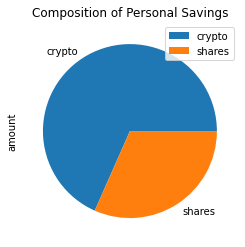

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings_amount = crypto_amount + shares_amount

# Validate saving health
# Check if total savings is greater than emergency fund, equal to the emergency fund or less than
# the emergency fund and display the appropriate message for each case
if total_savings_amount > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings_amount == emergency_fund:
    print("Congratulations! You have reached your emergency fund savings goal.")
elif total_savings_amount < emergency_fund:
    print(f"You are ${emergency_fund - total_savings_amount} away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-10', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830  2173058   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880  2952430   
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2017-12-21 00:00:00-05:00  267.73  268.385  267.300  267.57  34999954  
2017-12-22 00:00:00-05:00  267.60  267.635  266.900  267.48  36604044  
2017-12-26 00:00:00-05:00  267.06  267.390  266.885  267.17  24888478  
2017-12-27 00:00:00-05:00  267.36  267.730  267.010  267.33  32573906  
2017-12-28 00:00:00-05:00  267.85  267.920  267.450  267.86  23583584

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830  2173058   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880  2952430   
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-21 00:00:00-05:00          NaN  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   
2017-12-28 00:00:00-05:00    -0.000595  267.85  267.920  267.450  267.86   

                                                  
                             volume daily_return  
time                                              
2017-12-21 00:00:00-05:00  34999954          NaN  
2017-12-22 00:00:00-05:00  36604044    -0.000336  
2017-12-26 00:00:00-05:00  24888478    -0.001159  
2017-12-27 00:00:00-05:00  32573906     0.000599  
2017-12-28 00:00:00-05:00  23583584     0.001983

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# The MCForecastTools.py's calc_cumulative_return was changed to print progress 
# status every 100th Monte Carlo simulation run instead of every 10th
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995124,0.997288,0.996815,1.016692,1.003451,0.995368,1.003633,1.003046,0.999189,1.006957,...,1.007035,0.994398,1.002725,0.998500,0.990407,0.999001,1.001637,1.006673,0.999299,1.006113
2,0.983685,0.987337,0.987586,1.019496,0.998214,0.982656,1.004871,0.987885,1.000199,1.017580,...,0.994463,0.990784,0.976709,0.990172,0.993500,0.978731,1.007120,1.018422,1.010915,0.998175
3,0.991886,1.005581,0.998217,1.021779,1.017214,0.977054,1.014177,0.979593,0.996233,1.021317,...,1.003687,0.996605,0.972788,0.982391,0.973492,0.982296,1.009091,1.015973,1.008208,0.998612
4,0.984728,1.006366,0.991436,1.033438,1.010823,0.974780,1.019681,0.975984,0.999361,1.031302,...,0.994124,0.993754,0.977628,0.984996,0.958623,0.982380,1.003911,1.021949,1.008728,1.000309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,23.515521,22.514984,17.825224,13.793032,19.047258,26.460028,32.989055,24.031581,7.761828,10.939534,...,9.427434,51.628128,24.048754,18.235667,14.167772,19.121353,20.147083,18.321951,27.622817,13.519227
7557,23.568011,22.857924,17.857437,13.837441,18.945940,26.705870,32.850809,23.912400,7.741956,10.989885,...,9.496049,51.745836,24.178643,18.224946,14.274693,18.792618,20.097810,18.459344,27.517497,13.647066
7558,23.513693,22.655257,17.674255,13.702309,18.712855,26.476654,32.791487,24.111339,7.804138,10.934175,...,9.409347,51.938370,24.379122,18.198325,14.297546,18.791188,20.075978,18.535119,27.335574,13.515170
7559,23.528725,22.929147,17.570653,13.746232,18.745470,26.761953,32.859970,23.976871,7.850515,10.772993,...,9.487908,52.195512,24.409360,18.241957,14.243579,18.976751,19.909118,18.558634,27.375639,13.527601


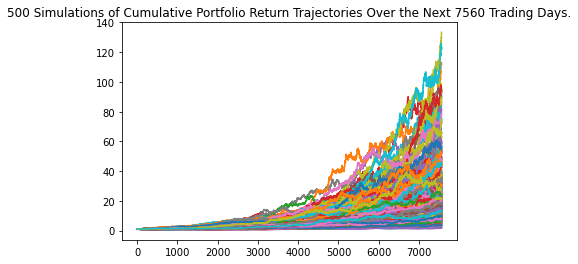

In [23]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

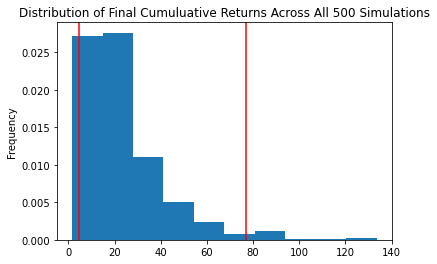

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             24.055841
std              18.458267
min               1.646628
25%              11.618619
50%              18.671564
75%              30.326128
max             133.439326
95% CI Lower      4.459837
95% CI Upper     76.970914
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89196.74 and $1539418.29


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $133795.12 and $2309127.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# The MCForecastTools.py's calc_cumulative_return was changed to print progress 
# status every 100th Monte Carlo simulation run instead of every 10th
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010434,1.006582,1.005174,0.998219,0.993540,0.995288,1.001437,1.003296,0.995111,1.004618,...,0.998623,1.003471,0.985533,1.009326,0.991513,0.984243,1.003437,0.988500,1.000099,1.009624
2,1.005447,0.991762,1.016230,1.008711,0.996126,0.996796,0.994741,0.994859,0.986535,1.001070,...,1.008323,1.001974,0.979644,1.006246,0.996822,0.985092,1.001494,0.987931,0.997912,1.013028
3,0.991293,0.992514,1.027195,1.008763,1.000957,0.999015,0.998940,1.000096,0.980753,0.986594,...,1.018950,1.000113,0.979257,1.003388,0.984685,0.985115,1.009205,0.981857,1.004789,1.015177
4,0.986389,0.994920,1.020586,1.014034,0.992229,0.998110,1.014771,1.011146,0.972824,0.987108,...,1.014479,1.012520,0.979224,1.005430,0.978824,0.981296,1.008235,0.973351,1.013619,1.006724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.535013,2.369385,1.684796,2.438452,1.734333,2.050732,1.573701,1.825455,1.945984,1.662286,...,1.807385,1.912880,1.260458,2.872268,2.255543,1.656635,1.928765,1.666101,1.966558,1.617056
1257,1.522098,2.361949,1.726011,2.427134,1.725501,2.038867,1.575518,1.837995,1.939017,1.683156,...,1.806491,1.909169,1.255101,2.893075,2.263541,1.666349,1.935980,1.653825,1.955642,1.596505
1258,1.537126,2.366441,1.726698,2.414270,1.726142,2.036115,1.564208,1.847856,1.946120,1.681577,...,1.817092,1.893641,1.246119,2.939280,2.272607,1.687790,1.947976,1.661597,1.937339,1.584857
1259,1.531460,2.347146,1.727947,2.401873,1.706049,2.031459,1.575180,1.850798,1.923301,1.676870,...,1.813563,1.884484,1.243281,2.932460,2.248902,1.710936,1.952291,1.648292,1.942252,1.594907


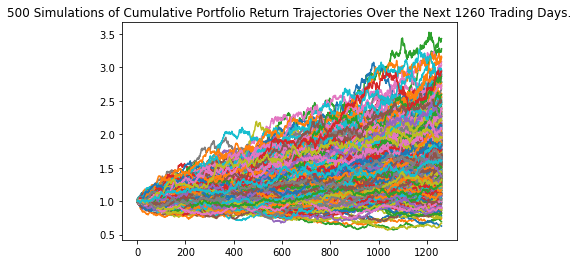

In [30]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

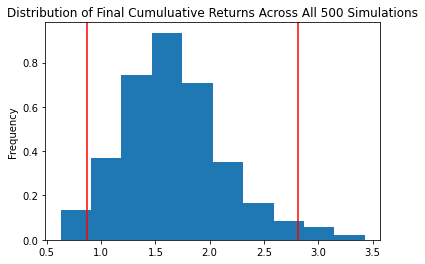

In [31]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.670259
std               0.474359
min               0.625815
25%               1.343117
50%               1.628961
75%               1.933978
max               3.429448
95% CI Lower      0.871613
95% CI Upper      2.811465
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment, 2)
ci_upper_five = round(tbl_five[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52296.77 and $168687.88


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988879,1.004283,1.000605,0.999470,0.994341,0.998651,1.008167,0.993690,0.997930,0.996638,...,1.012964,1.009683,1.007440,0.995286,0.984176,0.996149,1.000407,1.013599,1.007793,0.991964
2,0.994432,1.005929,1.001986,0.989716,1.004075,0.988380,1.008049,0.994074,1.007463,1.001545,...,1.021383,1.016440,1.008569,0.993712,0.986006,1.008325,1.003982,1.005233,1.011116,0.995833
3,1.011269,1.006637,1.004180,0.985725,1.009447,0.989317,1.012719,0.984896,1.009196,0.993080,...,1.021558,1.024633,1.013838,0.995930,0.984795,1.001900,1.008390,1.015905,1.025413,0.993111
4,1.015873,1.013157,1.002901,0.992378,1.015824,0.987002,1.025099,0.998874,1.016062,0.993099,...,1.021725,1.022854,1.018701,0.977278,0.981182,0.994844,1.006189,1.010385,1.027455,1.001195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.896103,1.735539,2.237308,3.471147,2.502481,7.859244,2.598569,3.864028,2.984347,2.783400,...,4.530292,2.294465,4.070491,2.488675,3.033402,2.700834,2.773418,3.444563,2.229098,2.378882
2517,3.886490,1.737627,2.195878,3.491996,2.508027,7.836410,2.575640,3.864203,3.051031,2.819261,...,4.521811,2.329843,4.083009,2.493078,3.002498,2.694399,2.778735,3.452561,2.199518,2.403632
2518,3.903616,1.724683,2.198572,3.492091,2.530134,7.884765,2.580211,3.841518,3.065974,2.807229,...,4.541420,2.328552,4.017918,2.467062,2.995569,2.724056,2.757046,3.439163,2.206236,2.392919
2519,3.896197,1.725719,2.174695,3.465137,2.569139,7.774912,2.589714,3.857138,3.029983,2.819467,...,4.499123,2.317176,3.967485,2.469882,2.980264,2.735344,2.728714,3.434007,2.218493,2.382513


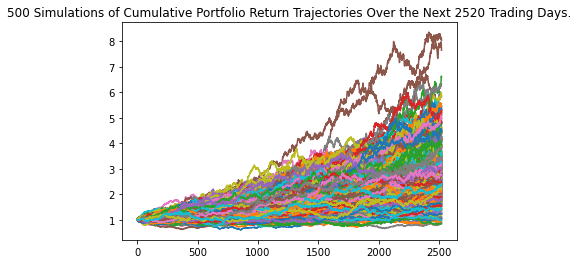

In [36]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

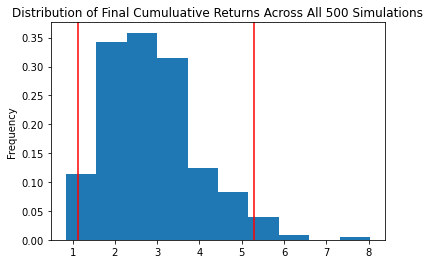

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.884962
std               1.092884
min               0.839240
25%               2.087465
50%               2.780807
75%               3.468117
max               8.036102
95% CI Lower      1.129061
95% CI Upper      5.297827
Name: 2520, dtype: float64


In [39]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment, 2)
ci_upper_ten = round(tbl_ten[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $67743.64 and $317869.63
